In [0]:
#Projet NLP 

In [2]:
#installing tensorflow library
!pip install tensorflow 

In [3]:
#loading libraries ...
print ("loading libraries")
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import tensorflow as tf 
import tensorflow_datasets as tfds
import pathlib 
import pandas as pd 
import nltk
tf.__version__
print ('done')



loading libraries


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


done


## **Exploring the dataset **

In [72]:
train_set = pd.read_csv('/content/drive/My Drive/Jedha-S7-projet NLP/train.csv')
train_set.head(6000)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
5995,8560,screams,BrasÌ_lia,~Still echoes of their screams~,0
5996,8561,screams,POFFIN,in every bts song jimin screams,0
5997,8562,screams,#Gladiator Û¢860Û¢757Û¢,Casually on the phone with Jasmine while she c...,0
5998,8567,screams,W.I.T.S Academy,@RealJaxClone *screams*,0


In [71]:
test_set = pd.read_csv('/content/drive/My Drive/Jedha-S7-projet NLP/test.csv')
test_set.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [73]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [74]:
train_set.shape

(7613, 5)

In [75]:
train_set = dataset.describe(include='all')
print (train_set)

                  id  ...      target
count    7613.000000  ...  7613.00000
unique           NaN  ...         NaN
top              NaN  ...         NaN
freq             NaN  ...         NaN
mean     5441.934848  ...     0.42966
std      3137.116090  ...     0.49506
min         1.000000  ...     0.00000
25%      2734.000000  ...     0.00000
50%      5408.000000  ...     0.00000
75%      8146.000000  ...     1.00000
max     10873.000000  ...     1.00000

[11 rows x 5 columns]


In [76]:
#data visualisation 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wd = WordCloud()
cloud = wd.generate(train_set.text)
plt.imshow(cloud)

TypeError: ignored

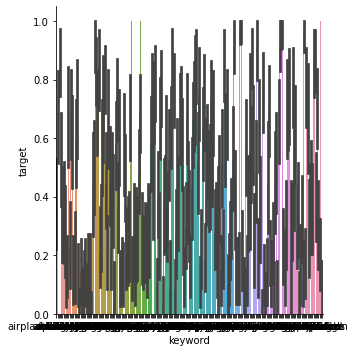

In [23]:
#data visualisation - keywords 
sns.catplot(x='keyword', y='target',kind='bar', data=dataset)

loading Spacy library ...


In [31]:
!pip install spacy
#python -m spacy download en_core_web_sm

import spacy

# Load English tokenizer, tagger, parser, NER and word vectors
#nlp = spacy.load("en_core_web_sm")
!python -m spacy download fr_core_news_sm

✔ Download and installation successful
You can now load the model via spacy.load('fr_core_news_sm')


In [77]:
train_set.head()

,id,keyword,location,text,target
count,7613.000000,7552,5080,7613,7613.00000
unique,NaN,221,3341,7503,NaN
top,NaN,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...,NaN
freq,NaN,45,104,10,NaN
mean,5441.934848,NaN,NaN,NaN,0.42966


Data preprocessing 

In [0]:
#data preprocessing 
import en_core_web_sm
nlp = en_core_web_sm.load()


In [78]:
#cleaning tweets
import re
Train = train_set.text
Train = Train.str.lower()

Train = tweets.apply(lambda x : re.sub(r"http\S+","",x) )
# removing special characters and numbers
#cleaned_tweets = tweets.apply(lambda x : re.sub("[^a-z\s]","",x) )
print(Train)

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610          M1.94 [01:04 UTC]?5km S of Volcano Hawaii. 
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 7613, dtype: object


In [79]:
# checking the shape of the dataset 
Train.shape()

TypeError: ignored

#Creating the tf dataset using pandas

Setting up the data ...

In [80]:
Train = dataset[["text", "target"]]
Train.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [81]:
#Data preprocessing 
Train= Train.dropna()
Train.shape


(7613, 2)

In [82]:
#creating tensorflow dataset 
tf_ds = tf.data.Dataset.from_tensor_slices((Train["text"].values, Train["target"].values))
print ('done')

done


In [83]:
#Randomizing the dataset 
tf_ds = tf_ds.shuffle(8000)
print ('done')

done


Data Tokenisation

In [84]:
#Tokenization - putting a number to each word in the corpus ( labelisation)
#create tokenization instance 
tokenizer = tfds.features.text.Tokenizer()

vocabulary_set= set()
for text_tensor, _ in tf_ds:
  doc = tokenizer.tokenize(text_tensor.numpy())
 # vocabulary_set.update(some_tokens)
  vocabulary_set.update(doc)

vocab_size = len(vocabulary_set)
vocab_size

25863

In [85]:
# creating a number for each token 
encoder = tfds.features.text.TokenTextEncoder(vocabulary_set)
print('done')

done


In [86]:
# checking with an example 
for example, _ in tf_ds.take(1):
  print(encoder.encode(example.numpy()))
  print(example.numpy())

[19681, 22042, 17200, 21664, 9826, 732, 7309, 479, 23434, 19283, 11370, 10704, 8100, 10851, 13905, 12168, 5812, 2594, 8422, 13486, 21664, 23901, 250, 17304]
b'The MF Life is a vocal and lyrical bomb. Saw her live this summer. AMAZING vocalist. RT @THEmale_madonna: Melanie Fiona is so slept on ??'


In [87]:
# Encoding dataset elements 
def encode(text_tensor, label):
  encoded_text = encoder.encode(text_tensor.numpy())
  return encoded_text, label

# using py_function to encode the dataset 
def encode_map_fn(text, label):
  return tf.py_function(encode, inp=[text, label], Tout=(tf.int64, tf.int64))

all_encoded_data = tf_ds.map(encode_map_fn)
print('done')

done


In [0]:
#data tokenisation
encoder = tfds.features.text.TokenTextEncoder(vocabulary_set)

In [89]:
encoder.vocab_size

25865

Splitting the data 

In [0]:
# Train Test Split
TAKE_SIZE = int(0.8*Train.shape[0])
train_data = all_encoded_data.take(TAKE_SIZE).shuffle(50000)
train_data = train_data.padded_batch(16,  padded_shapes=([-1], []))
test_data = all_encoded_data.skip(TAKE_SIZE)
test_data = test_data.padded_batch(16, padded_shapes=([-1], []))

Modeling 

In [0]:
model = tf.keras.Sequential([
                  # Couche d'Input Word Embedding           
                  tf.keras.layers.Embedding(encoder.vocab_size, 64),

                  # Couche LSTM Bidirectionnelle
                  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),

                  # Couche CNN
                  tf.keras.layers.Conv1D(16, 3, activation="relu"),
                  
                  # Nouvelle couche LSTM
                  tf.keras.layers.LSTM(32, return_sequences=False),               

                  # Couche Dense classique 
                  tf.keras.layers.Dense(64, activation='relu'),
                  tf.keras.layers.Dense(32, activation='relu'),
                  tf.keras.layers.Dense(16, activation='relu'),
                  tf.keras.layers.Dense(8, activation='relu'),

                  # Couche de sortie avec le nombre de neurones en sortie égale au nombre de classe avec fonction softmax
                  tf.keras.layers.Dense(6, activation="softmax")
                                              
])

Setting up learning rate 

In [0]:
# setting up the learning rate decay 
initial_learning_rate = 0.0001

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=1000,
    decay_rate=0.96,
    staircase=True)

# Using compilation and optimisation adam 
optimizer= tf.keras.optimizers.Adam(
    learning_rate = lr_schedule
)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [96]:
# Entrainement du modèle 
history = model.fit(train_data, epochs=20, validation_data=test_data)

Epoch 1/20
381/381 [==============================] - 23s 59ms/step - loss: 1.2226 - sparse_categorical_accuracy: 0.5695 - val_loss: 0.8077 - val_sparse_categorical_accuracy: 0.5666
Epoch 2/20
381/381 [==============================] - 22s 57ms/step - loss: 0.7250 - sparse_categorical_accuracy: 0.5677 - val_loss: 0.6894 - val_sparse_categorical_accuracy: 0.5804
Epoch 3/20
381/381 [==============================] - 22s 57ms/step - loss: 0.6888 - sparse_categorical_accuracy: 0.5721 - val_loss: 0.6945 - val_sparse_categorical_accuracy: 0.5410
Epoch 4/20
381/381 [==============================] - 22s 58ms/step - loss: 0.6857 - sparse_categorical_accuracy: 0.5709 - val_loss: 0.6778 - val_sparse_categorical_accuracy: 0.5883
Epoch 5/20
381/381 [==============================] - 22s 58ms/step - loss: 0.6865 - sparse_categorical_accuracy: 0.5657 - val_loss: 0.6831 - val_sparse_categorical_accuracy: 0.5791
Epoch 6/20
381/381 [==============================] - 21s 56ms/step - loss: 0.6859 - spars